In [1]:
# 数据路径
# 如果是手动下载数据集，`processed`文件夹放到'./data/FashionMNIST/'中。
DATA_PATH = './data/'
# 如果数据集不存在是否下载数据集
DOWNLOAD_DATASET = True
# 批量大小
BATCH_SIZE = 100
# 设置，如果GPU可用，是否使用GPU
USEGPU = True

In [2]:
# 用于构建神经网络和相应数据处理
import torch
import torch.utils.data
import torch.nn as nn
import torchvision
# 用于支持其他模块以及非torch的矩阵操作
import numpy as np
# 用于显示图像
import matplotlib.pyplot as plt

In [3]:
# 确定正在使用的运算设备
if USEGPU:
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
else:
    device = 'cpu'

print('using',device)

using cuda:0


上边的代码基本上都是我复制粘贴的。除了修改一下常数没有其他变动。从这里往下是载入和显示MNIST的代码。

In [4]:
# 构造数据转换器
dataset_transform = torchvision.transforms.ToTensor()
# 分别读取训练集和测试集
train_data = torchvision.datasets.FashionMNIST(root=DATA_PATH, train=True,download=DOWNLOAD_DATASET, 
                                        transform=dataset_transform)
test_data = torchvision.datasets.FashionMNIST(root=DATA_PATH, train=False,download=DOWNLOAD_DATASET, 
                                        transform=dataset_transform)
# 分别构造训练集和测试集的加载器
# 在这一步进行shuffle打乱样本顺序
# 其实加载器每遍历一次都要随机重排一次
DataLoader = torch.utils.data.DataLoader
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
# 输出一些数据集信息
# 用len函数计算长度的时候，得出的是批次数量而不是样本数量。
# 批次数量乘以每批次样本数量才是总样本数量
print('length of trainset:', len(train_loader))
print('length of testset:', len(test_loader))

length of trainset: 600
length of testset: 100


In [6]:
def ViewDataset(datasetLoader, index):
    for i,data in enumerate(datasetLoader):
        if i==index:
            img, label =data
            tempimg = torchvision.utils.make_grid(img, pad_value=0.5, nrow=10)
            print('labels:')
            print(label.numpy())
            print('images:')
            # 设定要显示的内容
            plt.imshow(np.transpose(tempimg.numpy(),(1, 2, 0)))
            # 执行show函数就显示
            plt.show()
            break

labels:
[4 3 8 1 3 6 4 6 7 6 6 9 9 4 6 5 1 6 9 4 8 8 7 4 3 7 9 0 3 7 8 4 2 3 5 4 5
 2 8 5 9 9 1 4 6 5 2 4 7 9 9 5 9 5 4 7 9 7 3 5 5 4 4 4 8 3 4 4 9 6 4 7 1 5
 2 0 6 0 1 9 3 1 7 6 7 3 6 7 6 4 0 2 9 4 5 7 0 1 1 3]
images:


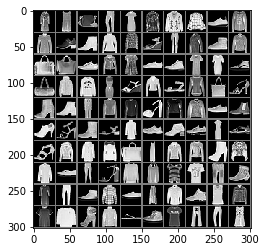

In [7]:
ViewDataset(train_loader, 20)

labels:
[6 7 5 1 5 5 0 1 4 3 9 9 9 9 8 1 7 8 2 7 6 9 5 7 5 3 5 0 2 1 1 7 7 5 3 4 8
 7 0 2 9 6 2 6 4 9 1 6 7 2 1 9 2 1 8 3 3 8 3 4 3 2 0 6 7 0 8 7 5 6 4 6 7 4
 3 4 3 5 1 8 1 6 9 7 7 6 2 2 6 5 5 7 2 3 0 6 2 0 7 5]
images:


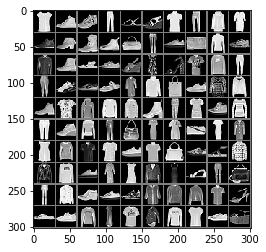

labels:
[8 5 1 5 2 1 5 4 3 4 5 9 0 1 7 4 6 0 0 7 0 9 5 9 5 9 2 4 9 1 6 5 7 9 0 4 6
 8 5 2 8 5 5 0 9 5 9 5 9 6 9 2 9 5 2 1 4 4 3 2 3 4 4 2 3 8 1 9 0 8 2 0 0 1
 0 3 8 5 9 8 0 8 3 1 8 2 0 6 5 6 4 6 8 9 9 3 4 4 2 2]
images:


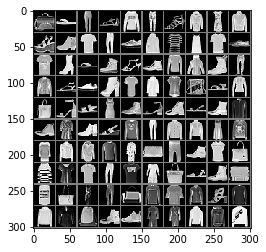

In [8]:
# 运行两次读取20批次
# 发现输出结果不同
# 因为每次遍历加载器都要随机重排一次
# 实际上加批次号是没有意义的
ViewDataset(train_loader, 20)
ViewDataset(train_loader, 20)

In [9]:
# 改写ViewDataset如下。num控制显示多少个批次的图片。
def ViewDataset(datasetLoader, num):
    for i,data in enumerate(datasetLoader):
        if i<num:
            img, label =data
            tempimg = torchvision.utils.make_grid(img, pad_value=0.5, nrow=10)
            print('labels:')
            print(label.numpy())
            print('images:')
            # 设定要显示的内容
            plt.imshow(np.transpose(tempimg.numpy(),(1, 2, 0)))
            # 执行show函数就显示
            plt.show()
        else:
            break

labels:
[0 2 9 5 5 5 5 7 5 0 6 2 0 8 2 2 6 3 6 2 7 1 8 7 2 9 9 7 2 0 4 3 5 7 3 2 6
 5 0 4 5 4 9 0 5 5 9 1 5 7 3 3 9 4 3 4 6 4 4 7 2 3 5 1 9 3 2 8 6 1 2 5 5 8
 7 9 5 2 1 9 6 6 2 8 7 1 3 4 2 8 2 6 2 9 8 2 8 0 5 8]
images:


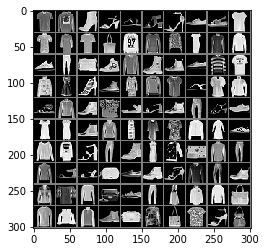

labels:
[7 9 5 1 9 8 7 2 4 0 3 9 6 7 9 7 1 6 9 9 1 7 5 7 0 0 7 5 9 1 7 5 3 8 5 1 0
 9 1 3 5 5 4 1 7 6 6 9 9 4 9 0 9 2 4 1 6 3 6 8 0 6 6 4 7 8 1 8 1 4 2 0 0 4
 8 3 0 9 0 7 6 7 8 9 3 4 4 3 1 4 9 2 9 4 7 9 2 1 7 2]
images:


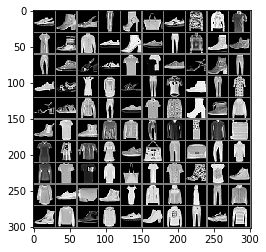

In [10]:
ViewDataset(train_loader,2)

labels:
[5 4 3 1 0 9 3 1 2 9 1 9 3 5 9 7 7 0 8 3 2 4 4 5 8 3 1 0 3 1 7 8 4 8 2 0 7
 2 2 9 8 2 4 0 2 7 2 6 1 7 3 4 0 3 0 8 9 8 5 0 1 4 2 0 9 7 8 0 4 3 2 9 6 2
 3 3 5 3 2 2 2 7 5 4 6 9 3 2 8 7 8 3 6 3 5 2 7 1 3 3]
images:


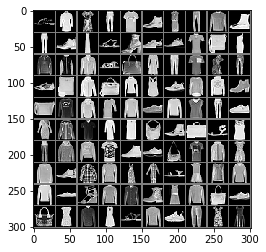

labels:
[2 2 2 1 4 3 6 9 6 5 1 0 7 5 6 9 7 6 6 9 0 8 7 1 3 7 1 7 6 3 2 0 1 1 4 5 4
 4 2 2 7 5 3 2 8 9 8 4 5 0 9 3 1 3 2 8 7 2 7 8 2 7 9 1 0 4 9 0 2 4 6 5 7 2
 4 2 2 4 6 2 8 9 9 5 4 4 7 0 5 4 2 6 2 9 0 1 2 4 9 6]
images:


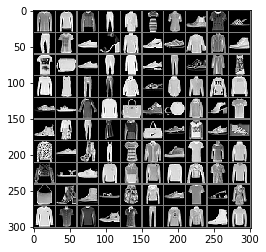

labels:
[7 6 9 7 9 2 5 2 2 3 5 2 0 8 5 8 3 8 3 3 4 5 1 4 4 0 4 1 5 0 7 6 6 6 1 0 6
 0 1 9 1 9 7 0 6 4 2 3 0 0 1 3 7 2 7 5 6 0 8 4 6 9 0 4 2 6 4 1 5 2 8 9 2 1
 5 2 1 1 6 3 4 8 9 7 6 9 3 4 0 7 8 2 0 2 6 6 3 0 9 5]
images:


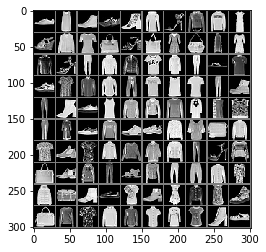

In [11]:
ViewDataset(test_loader, 3)

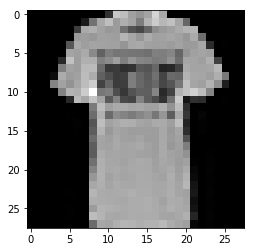

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1961, 0.7804, 0.7451, 0.6314, 0.5843, 0.6353, 0.8314, 0.6627,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1020, 0.4471,
         0.6588, 0.7451, 0.6078, 0.6863, 0.6431, 0.4902, 0.7020, 0.7961, 0.7176,
         0.7529, 0.6471, 0.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2392, 0.6627, 0.6863,
         0.6353, 0.5961, 0.6118, 0.4431, 0.3255, 0.2784, 0.3961, 0.5529, 0.6000,
         0.6275, 0.6667, 0.7020, 0.7059, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6078, 0.6157, 0.5961,
         0.6314, 0.6275, 0.6196, 0.7098, 0.6510, 0.5922, 0.6706, 0.6314, 0.6353,
         0.6510, 0.6314, 0.5922, 0.6667, 0.4314, 0.0000

In [12]:
# 这个小实验要说明plt绘制的图像中，每个像素的值都是[0,1]区间上的。
# 以后我们也统一把图像像素值预处理到这个区间上。
# 有的图像会用0到255以内（或者更大范围）的整数。但是我们遇到这种情况都尽量转换到[0,1]区间上。
for i,data in enumerate(train_loader):
    img, label = data
    tempimg = torchvision.utils.make_grid(img[0])
    plt.imshow(np.transpose(tempimg.numpy(),(1, 2, 0)))
    # 执行show函数就显示
    plt.show()
    # make_grid默认生成三通道图像，我们这里只看一个通道
    print(tempimg[0])
    break
